# Projeto 2 -- Ciência dos Dados



### Integrantes: Bruno Leite, Hugo Mendes, Matheus Campbell e Felipe Pereira


### Introdução

No projeto 2, foi utilizado como base o projeto de co-design de aplicativos do "Portifólio de trabalhos". A partir de tal portifólio elaboramos duas versões (denominadas genericamente de A e B) diferentes entre si. Após isso, foi dada a tarefa ao usuário de encontrar um determinado projeto em uma das interfaces. Assim, após um número grande de "respostas" de usuários, poderiamos ver qual modelo de interface requer um tempo menor para encontrar determinado projeto.

Em nosso projeto a diferença entre as versões A e B se deu pela diferença nos nomes das categorias e nas fotos que as representavam. Desta maneira poderiamos avaliar qual tipo de interface ajudaria o usuário a encontrar o projeto escolhido (no nosso caso o projeto escolhido foi do Application Singularity).

O site que fez o teste com os usuários foi o seguinte: https://teste-ab-ciencia-dos-dados.firebaseapp.com/index.html

### Análise Descritiva


In [1]:
import pandas as pd
import json
import itertools
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [2]:
dados = open("teste-ab.json")
lines = dados.readlines()
texto = "".join(lines)
dados_fire = json.loads(texto)

In [3]:
for k,v in dados_fire["logs"].items():
    # print(k,v) # habilite para imprimir as chaves de mais alto nível
    for chave, valor in v.items():
        # print(chave, valor) # habilite para imprimir as chaves inferiores
        pass # desabilite quando reabilitar a linha de cima

In [4]:
lista_dicionarios = []

for k,v in dados_fire["logs"].items():
    lista_dicionarios.append(v)

In [5]:
dataframe = pd.DataFrame.from_records(lista_dicionarios)
print(dataframe)

             tempo    tipo     user_id versao
0    1479394627834  inicio  3628404743      B
1    1479395549156  inicio  1691440476      B
2    1479405094977  inicio  1263987790      B
3    1479390747682   final  3628404743      B
4    1479395892758   final  1752740566      B
5    1479393032680  inicio  4076490866      B
6    1479378300492   final   343915892      A
7    1479404852137  inicio  1603300186      B
8    1479381659005   final  1890498751      A
9    1479403945428  inicio  2135023914      B
10   1479395889309  inicio  1738006336      A
11   1479395006049  inicio  3111315822      B
12   1479394704377  inicio   594019486      B
13   1479381645143  inicio  1890498751      A
14   1479348739887  inicio   193708577      A
15   1479383268057  inicio  3416774269      B
16   1479396459441  inicio  3628404743      B
17   1479395608464  inicio  1625061845      B
18   1479393534858  inicio  1209563629      B
19   1479393554023   final  1209563629      B
20   1479349199016  inicio    7274

In [20]:
agrupado = dataframe.groupby(by=["user_id", "versao"])
users = set(dataframe.user_id) # We convert it to a set so that each user appear only once
users = list(users)
resultados = []

for u in users:
    for versao in ["A", "B"]:
        if (u, versao) in agrupado.groups.keys(): # Check if a specific pair user/type of test happened
            grupo1 =  agrupado.get_group((u, versao))
            grupo1 = grupo1.sort_values(by="tempo") # Para evitar que inícios sem fim gerem tempos negativos
            
            if len(grupo1[grupo1.tipo=="final"])>= 1 and len(grupo1[grupo1.tipo=="inicio"]) >= 1:
                delta_t = grupo1[grupo1.tipo=="final"].iloc[-1].tempo - grupo1[grupo1.tipo=="inicio"].iloc[0].tempo
                resultados.append({"user_id":u, "delta_t":delta_t, "versao":versao})


In [21]:
grupo1.sort_values(by="tempo")  
dataframe_resumo = pd.DataFrame.from_records(resultados)
dataframe_resumo.delta_t/=1000
d = dataframe_resumo 
d

,delta_t,user_id,versao
0,15.683,848249732,B
1,59.441,2897576454,A
2,1025.646,3628404743,A
3,61.151,3628404743,B
4,92.334,3789181448,A
5,12.940,3789181448,B
6,138.761,72740114,A
7,83.809,2901778078,A
8,23.439,193708577,A
9,921.103,2135023914,A


In [8]:
d.delta_t = d.delta_t.astype('float')
d.versao = d.versao.astype('category')

In [25]:
A = d.delta_t[(d.versao=='A')]
A.describe()

count      21.000000
mean      173.074095
std       285.173731
min        12.432000
25%        45.257000
50%        76.122000
75%       106.097000
max      1025.646000
Name: delta_t, dtype: float64

In [26]:
B = d.delta_t[(d.delta_t < 149811.770)&(d.versao=='B')]
B.describe()

count     12.000000
mean      62.992583
std      131.127540
min        9.747000
25%       15.335500
50%       20.811500
75%       38.077750
max      476.821000
Name: delta_t, dtype: float64

In [27]:
faixa = np.arange(10,171,20)
variávelCat = pd.cut(d.delta_t[(d.versao=='A')], faixa) 
variávelCat.value_counts()

(70, 90]      5
(10, 30]      4
(30, 50]      3
(130, 150]    2
(90, 110]     2
(50, 70]      2
(150, 170]    0
(110, 130]    0
dtype: int64

In [28]:
variávelCat2 = pd.cut(d.delta_t[(d.delta_t < 149811.770)&(d.versao=='B')], faixa) 
variávelCat2.value_counts()

(10, 30]      7
(30, 50]      2
(50, 70]      1
(150, 170]    0
(130, 150]    0
(110, 130]    0
(90, 110]     0
(70, 90]      0
dtype: int64

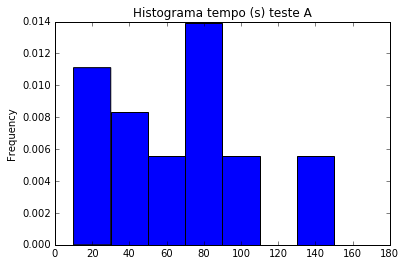

In [55]:
print("")
plot = d.delta_t[(d.versao=='A')].plot.hist(bins = faixa, normed =1, color = 'b')
plt.title("Histograma tempo (s) teste A")
plt.show()

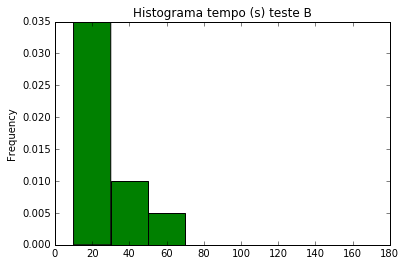

In [54]:
print("")
plot = d.delta_t[(d.versao=='B')].plot.hist(bins = faixa, normed =1, color = 'g')
plt.title("Histograma tempo (s) teste B")
plt.show()

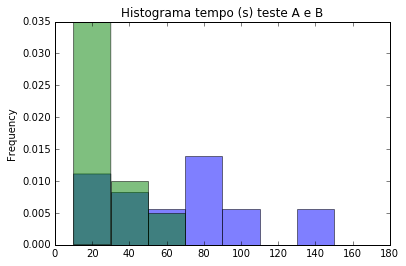

In [59]:
plot = d.delta_t[(d.versao=='A')].plot.hist(bins = faixa, normed =1, alpha = 0.5, color='b')
plot = d.delta_t[(d.versao=='B')].plot.hist(bins = faixa, normed =1, alpha = 0.5, color='g')
plt.title("Histograma tempo (s) teste A e B")

A partir dos histogramas acima pode-se perceber que o tempo que levou para um usuário encontrar o projeto proposto no modelo B foi menor do que o tempo no modelo A.

### Análise inferencial

H0 :miA = miB
   
   A hipótese nula assume que a o mi de A seja igual ao mi de B.




Ha :miA != miB
   
   A hipótese alternativa assume, por sua vez, que miA e miB sejam diferentes.

Estabelecimento do Z crítico:
Como o teste é bilateral, assume-se que o alfa será divido entre as duas extremidades. Considerando um alfa = 0.05 = 5%, a area de rejeição à hipótese nula é de 0.025 na esquerda da cauda e na direita. Desta maneira a área de aceitção de torna 0,475 para esquerda e para a direita a partir do centro da normal. A partir deste valor, observando a tabela normal, obtem-se o valor de Zcrítico=1.96.


In [29]:
#estabelecendo parâmetros:
mi = 62.993
dp = 131.127
n=21
xl= 173.074
alfa=0.05
zteste = (xl - mi)/(dp/(n**(1/2)))
print(zteste)


3.8470682245184733


O valor de zteste encontrado for praticamente o dobro do Zcrítico encontrado anteriormente. Com isso, conclui-se que ambos os testes não são iguais uma vez que o valor do zteste caiu na área de rejeição da hipótese nula.

### Conclusão

A partir da análise descritiva, foi possível verificar que os usuários demoraram menos tempo para encontrar o projeto Application Singularity (projeto escolhido para o usuário encontrar) quando se depararam com o modelo de interface B do que quando se depararam com o modelo A. Tal análise foi feita, principalmente, por meio de histogramas.

Isso porém não seria suficiente para constatar que ambos os testes têm uma diferença significativa entre si. Desta maneira foi feita a análise inferencial e, com ela, constatou-se que os testes implicavam em grandes mudanças na hora de encontrar o projeto proposto.

Por fim, conclui-se que o modelo de interface B é mais adequado para o reconhecimento do projeto Application Singularity do que o modelo A.